# Analyze results

In [20]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import sys 

# Add the directory containing the module to the Python path
module_path = '/home/tachennf/Documents/delta-rad/1D_radiomics/utils'
if module_path not in sys.path:
    sys.path.append(module_path)

# Now you can import your module
import analysis_functions as af
import dataset

# Retest Récidive Locale


In [21]:
params = dataset.load_config("/home/tachennf/Documents/delta-rad/1D_radiomics/nested_cv_settings.yaml")
folder_path = params['paths']['data_folder_path']
outcome_csv = params['paths']['outcome_csv_file']
results_file = params['paths']['results_file']   
delta_rad_tables = params['paths']['delta_rad_tables']
outcomes_list = params['parameters']['outcomes_list']
feat_sel_algo_list = params['parameters']['feat_sel_algo_list']
pred_algo_list = params['parameters']['pred_algo_list']
nice_tables = ['SIMU', 'F1', 'F3', 'F5', 'Simu_F1', 'Simu_F3', 'Simu_F5', 'F1_F3', 'F1_F5']

results = pd.read_json(results_file)
results_dict = json.load(open(results_file))
print(results_dict.keys())  
print(pred_algo_list)
print(feat_sel_algo_list)

dict_keys(['simu_mridian_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 'rd_f1_f5_gtv.csv'])
['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN', 'BAGG', 'QDA']
['ANOVA_K_BEST', 'RDM_SEL', 'RF']


# Compare one algo with different metrics and CI

In [22]:
pred_algo = "RF"
feat_sel_algo = "ANOVA_K_BEST"
inter_res = results['simu_mridian_gtv.csv'][feat_sel_algo][pred_algo]['Récidive Locale']
#for table in delta_rad_tables: 
for nb_features in inter_res.keys():
    print(nb_features, inter_res[nb_features]['features'])
    print("Train AUC: ", np.mean(inter_res[nb_features]['train_metrics']['auc']['values']))
    print(inter_res[nb_features]['test_metrics']['auc'])
    print("Test AUC: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['auc']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[1]))
    print("Test Brier loss: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['brier_loss']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[1]))
    print("Test sensitivity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['sensitivity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[1]))
    print("Test specificity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['specificity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[1]))
    print('')


1 ['original_shape_Elongation']
Train AUC:  0.7224496877870716
{'values': [0.5395767502551421, 0.5497809142461201, 0.49633651467580003, 0.9041176688430811, 0.5771284391414261], 'conf_int': [[0.20753205128205102, 0.835897435897435], [0.164423076923076, 0.818181818181818], [0.16666666666666602, 0.8086538461538461], [0.5769230769230761, 1.0], [0.123958333333333, 0.9092424242424241]]}
Test AUC: 0.6133880574323138 (0.2479006410256404; 0.8743951048951046)
Test Brier loss: 0.26052535045680403 (0.1803953934551826; 0.34371136551865844)
Test sensitivity: 0.3833333333333332 (0.3833333333333332; 0.3833333333333332)
Test specificity: 0.6036363636363634 (0.6036363636363634; 0.6036363636363634)

2 ['original_shape_Elongation', 'original_firstorder_Kurtosis']
Train AUC:  0.7473012702999102
{'values': [0.5620239641578021, 0.35564168077054603, 0.409430532178199, 0.7701797444798161, 0.6814678026491211], 'conf_int': [[0.21792307692307603, 0.8908839285714281], [0.09840909090909, 0.6724999999999991], [0.0, 

## Best train AUC

In [23]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='train_auc', k = 3)

Top 3 results for each table and Récidive Locale in terms of train_auc:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean train_auc: 1.0, Prediction Algorithm: BAGG, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation']
Mean train_auc: 1.0, Prediction Algorithm: BAGG, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy']
Mean train_auc: 1.0, Prediction Algorithm: BAGG, Feature Selection Algorithm: RF, Features: ['original_glcm_Idn']


Top 3 mean results for table f1_gtv.csv:
Mean train_auc: 1.0, Prediction Algorithm: BAGG, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC']
Mean train_auc: 1.0, Prediction Algorithm: BAGG, Feature Selection Algorithm: RDM_SEL, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis']
Mean train_auc: 1.0, Prediction Algorithm: BAGG, Feature Selection Algorithm: RF, Features: ['original_glcm

Top 10 results for each table and Récidive Locale in terms of train_auc:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17d9417460>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17d94179a0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17d94171c0>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17d9417ee0>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17d94231c0>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of train AUC for récidive locale'),
 (0.0, 1.0),
 ([<matplotlib.axis.XTick at 0x7f17d9464670>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

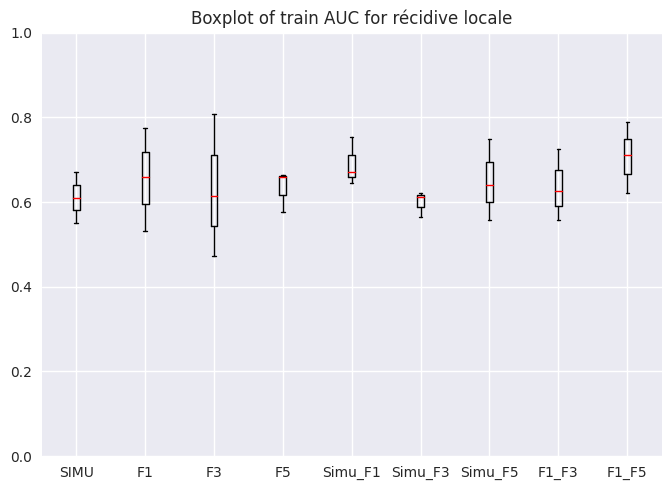

In [37]:
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')

data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='train_auc', outcome='Récidive Locale', k=10)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of train AUC for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best train Brier loss

In [25]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='train_brier_loss', k = 3)

Top 3 results for each table and Récidive Locale in terms of train_brier_loss:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean train_brier_loss: 0.26692027234346904, Prediction Algorithm: QDA, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy', 'original_shape_SurfaceVolumeRatio']
Mean train_brier_loss: 0.2552904424829212, Prediction Algorithm: QDA, Feature Selection Algorithm: RF, Features: ['original_glcm_Idn']
Mean train_brier_loss: 0.2511236264644922, Prediction Algorithm: PSVM, Feature Selection Algorithm: RF, Features: ['original_glcm_Idn']


Top 3 mean results for table f1_gtv.csv:
Mean train_brier_loss: 0.29593095704776645, Prediction Algorithm: QDA, Feature Selection Algorithm: RDM_SEL, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis']
Mean train_brier_loss: 0.2547729450641134, Prediction Algorithm: PSVM, Feature Selection Algorithm: ANOVA_K_BEST, Feat

Top 10 results for each table and Récidive Locale in terms of train_brier_loss:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17d9569c40>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17d957d1c0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17d95699a0>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17d957d5e0>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17d957d880>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of train Brier loss for récidive locale'),
 (0.0, 0.5),
 ([<matplotlib.axis.XTick at 0x7f17d9540ac0>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

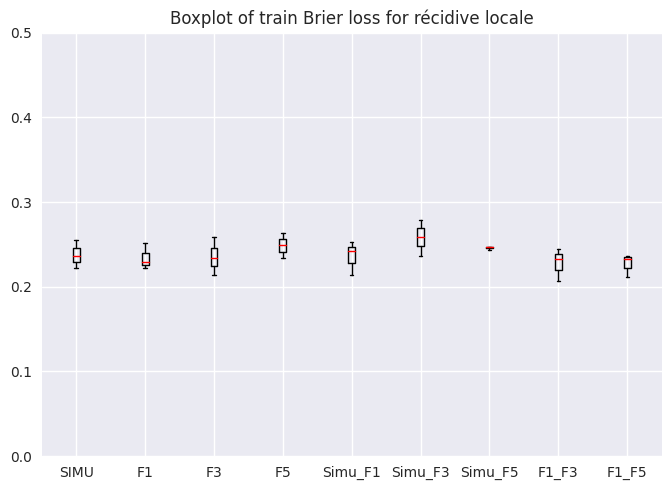

In [36]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='train_brier_loss', outcome='Récidive Locale', k=10)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of train Brier loss for récidive locale'), plt.ylim([0, 0.5]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best test AUC

In [27]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='test_auc', k = 3)

Top 3 results for each table and Récidive Locale in terms of test_auc:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean test_auc: 0.6430363924197204, Prediction Algorithm: PSVM, Feature Selection Algorithm: RF, Features: ['original_glcm_Idn', 'original_glcm_Id']
Mean test_auc: 0.6371033672881247, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation']
Mean test_auc: 0.6133880574323138, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation']


Top 3 mean results for table f1_gtv.csv:
Mean test_auc: 0.7745192375483605, Prediction Algorithm: BAGG, Feature Selection Algorithm: RDM_SEL, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis']
Mean test_auc: 0.7570068324370336, Prediction Algorithm: ADABOOST, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC']
Mean test_auc: 0.7482548796939057, Predictio

Top 10 results for each table and Récidive Locale in terms of test_auc:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17d91ccc70>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17d91e01f0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17d91cc9d0>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17d91e0730>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17d91e09d0>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of test AUC for récidive locale'),
 (0.0, 0.8),
 ([<matplotlib.axis.XTick at 0x7f17d9223e50>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

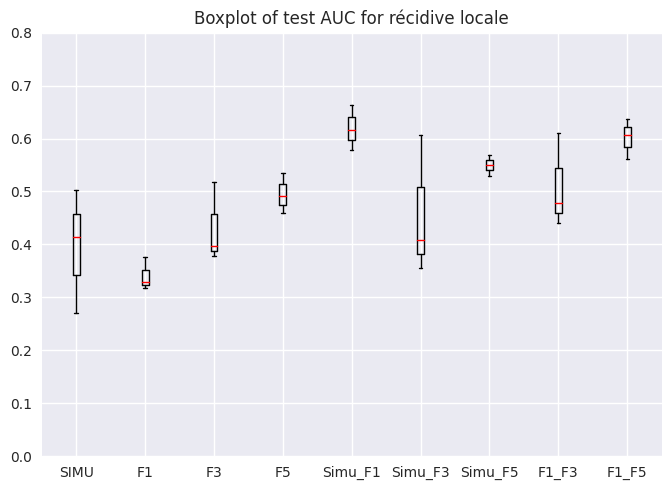

In [39]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='test_auc', outcome='Récidive Locale', k=10)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of test AUC for récidive locale'), plt.ylim([0, 0.8]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best test brier loss

In [29]:
test_brier_loss = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='test_brier_loss', k = 3)

Top 3 results for each table and Récidive Locale in terms of test_brier_loss:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean test_brier_loss: 0.39476150793650744, Prediction Algorithm: KNN, Feature Selection Algorithm: RF, Features: ['original_glcm_Idn', 'original_glcm_Id']
Mean test_brier_loss: 0.3888635660647212, Prediction Algorithm: QDA, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy', 'original_shape_SurfaceVolumeRatio']
Mean test_brier_loss: 0.3883777524748089, Prediction Algorithm: BAGG, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Maximum2DDiameterRow']


Top 3 mean results for table f1_gtv.csv:
Mean test_brier_loss: 0.48295398539546197, Prediction Algorithm: QDA, Feature Selection Algorithm: RDM_SEL, Features: ['original_glcm_Imc1', 'original_glcm_MCC', 'original_glszm_LargeAreaHighGrayLevelEmphasis']
Mean test_brier_loss: 0.4272584201388886, Prediction Algorithm: KNN, Feature Sel

Top 10 results for each table and Récidive Locale in terms of test_brier_loss:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17d90fc9a0>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17d90fcee0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17d90fc700>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17d908d460>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17d908d700>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of test Brier loss for récidive locale'),
 (0.0, 0.5),
 ([<matplotlib.axis.XTick at 0x7f17d90cad30>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

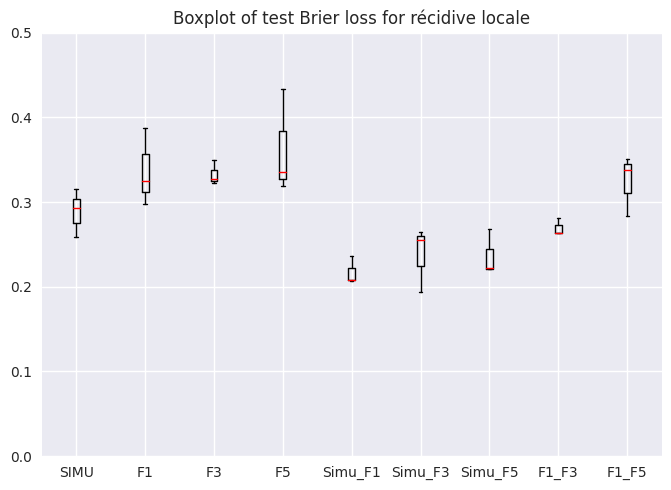

In [40]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='test_brier_loss', outcome='Récidive Locale', k=10)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of test Brier loss for récidive locale'), plt.ylim([0, 0.5]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best sensitivity

In [31]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='sensitivity', k = 3)

Top 3 results for each table and Récidive Locale in terms of sensitivity:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean sensitivity: 0.7, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis']
Mean sensitivity: 0.6, Prediction Algorithm: PSVM, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis']
Mean sensitivity: 0.55, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation', 'original_firstorder_Kurtosis']


Top 3 mean results for table f1_gtv.csv:
Mean sensitivity: 0.7833333333333332, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC']
Mean sensitivity: 0.7333333333333332, Prediction Algorithm: RF, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC']
Mean sensitivity: 0.7333333333333332, Pre

Top 10 results for each table and Récidive Locale in terms of sensitivity:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17d8f94e50>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17d8fa93d0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17d8f94bb0>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17d8fa9910>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17d8fa9bb0>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of sensitivity for récidive locale'),
 (0.0, 1.0),
 ([<matplotlib.axis.XTick at 0x7f17d8fef8e0>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

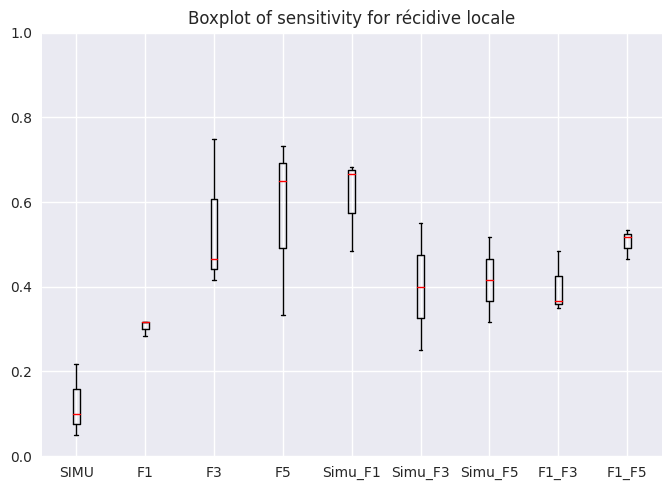

In [41]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='sensitivity', outcome='Récidive Locale', k=10)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of sensitivity for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best specificity

In [33]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='specificity', k = 3)

Top 3 results for each table and Récidive Locale in terms of specificity:
Top 3 mean results for table simu_mridian_gtv.csv:
Mean specificity: 0.909090909090909, Prediction Algorithm: PSVM, Feature Selection Algorithm: RF, Features: ['original_glcm_Idn', 'original_glcm_Id', 'original_glcm_JointEntropy']
Mean specificity: 0.8636363636363631, Prediction Algorithm: LOGREGRIDGE, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy', 'original_shape_SurfaceVolumeRatio']
Mean specificity: 0.8290909090909089, Prediction Algorithm: PSVM, Feature Selection Algorithm: RDM_SEL, Features: ['original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy', 'original_shape_SurfaceVolumeRatio']


Top 3 mean results for table f1_gtv.csv:
Mean specificity: 0.8818181818181815, Prediction Algorithm: BAGG, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_glcm_MCC', 'original_firstorder_Entropy', 'original_firstorder_Kurtosis']

Top 10 results for each table and Récidive Locale in terms of specificity:


({'whiskers': [<matplotlib.lines.Line2D at 0x7f17d8eb6f40>,
  'caps': [<matplotlib.lines.Line2D at 0x7f17d8e484c0>,
  'boxes': [<matplotlib.lines.Line2D at 0x7f17d8eb6ca0>,
  'medians': [<matplotlib.lines.Line2D at 0x7f17d8e488e0>,
  'fliers': [<matplotlib.lines.Line2D at 0x7f17d8e48b80>,
  'means': []},
 Text(0.5, 1.0, 'Boxplot of specificity for récidive locale'),
 (0.0, 1.0),
 ([<matplotlib.axis.XTick at 0x7f17d8e8de80>,
  [Text(1, 0, 'SIMU'),
   Text(2, 0, 'F1'),
   Text(3, 0, 'F3'),
   Text(4, 0, 'F5'),
   Text(5, 0, 'Simu_F1'),
   Text(6, 0, 'Simu_F3'),
   Text(7, 0, 'Simu_F5'),
   Text(8, 0, 'F1_F3'),
   Text(9, 0, 'F1_F5')]))

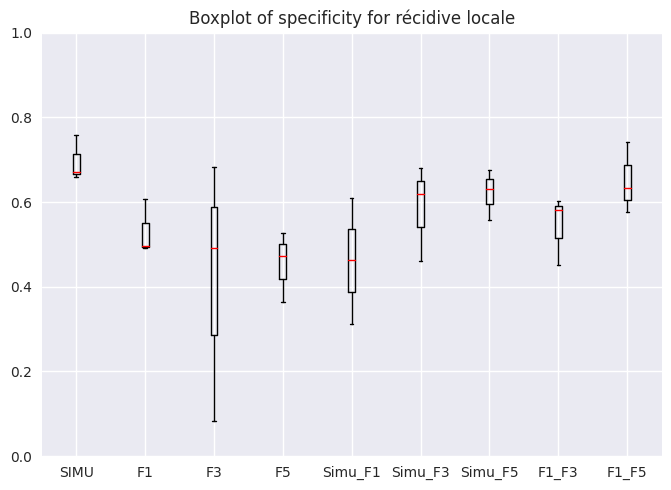

In [42]:
data = af.get_best_results_to_plot(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric='specificity', outcome='Récidive Locale', k=10)
plt.boxplot(data.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of specificity for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 


## Best spe & sens

In [35]:
af.find_perf_alg(results, delta_rad_tables, ['Récidive Locale'], feat_sel_algo_list, pred_algo_list, metric='sens_spec', threshold=0.6)

Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Number of Features: 1, '
'                                           TEST AUC: 0.6878576188494153, Sensitivity: 0.7333333333333332, Specificity: 0.6090909090909087, '
'                                           Features: ['original_glcm_MCC']
Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: KNN, Number of Features: 1, '
'                                           TEST AUC: 0.7482548796939057, Sensitivity: 0.6499999999999998, Specificity: 0.6590909090909088, '
'                                           Features: ['original_glcm_MCC']
Table: f3_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Number of Features: 3, '
'                                           TEST AUC: 0.6569577684767776, Sensitivity: 0.6666666666666666, Specificity: 0.7196969696969693, '
'   